Objectice: To predict whether a customer will purchase an Iphone from their store given their gender, age and salary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/user/Downloads/iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
# make a copy of data
df=data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
df.info

<bound method DataFrame.info of      Gender  Age  Salary  Purchase Iphone
0      Male   19   19000                0
1      Male   35   20000                0
2    Female   26   43000                0
3    Female   27   57000                0
4      Male   19   76000                0
..      ...  ...     ...              ...
395  Female   46   41000                1
396    Male   51   23000                1
397  Female   50   20000                1
398    Male   36   33000                0
399  Female   49   36000                1

[400 rows x 4 columns]>

In [6]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

There are no null values in the data

In [8]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


1.Minimum age is 18 years while maximum age is 60 years

2.Minimum salary is 15k while maximum salary is 150k

In [9]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

So, the number of females are higher than the males.

In [10]:
df[(df['Gender']=='Female') & (df['Purchase Iphone']==1)]['Gender'].count()

77

Out of 204, 77 females have purchased Iphones

In [11]:
df[(df['Gender']=='Male') & (df['Purchase Iphone']==1)]['Gender'].count()

66

Out of 196, 66 males have purchased Iphones

## Exploratory Data Analysis

In [12]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

Text(0.5, 1.0, '# of genders')

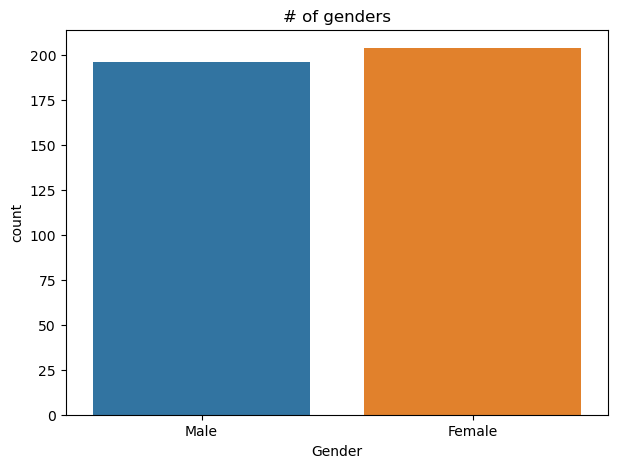

In [13]:
# Number of Males and Females in the data
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',data=df) 
plt.savefig('total gender.jpg',bbox_inches='tight',dpi=200)
plt.title('# of genders')

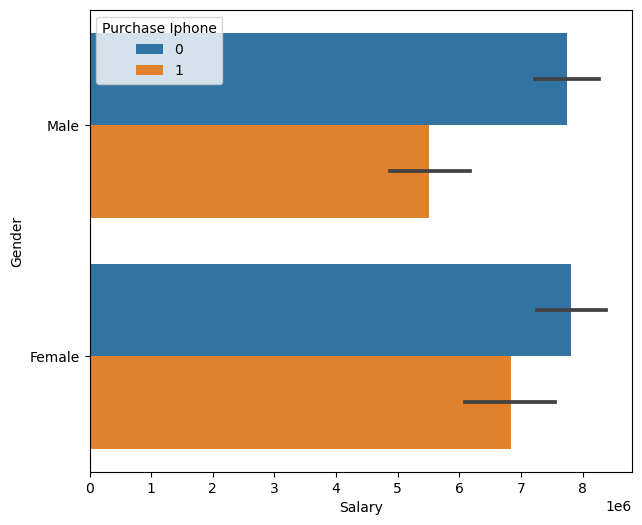

In [14]:
# gender and salary wise Iphone purchase
plt.figure(figsize=(7,6))
sns.barplot(data=df,x='Salary',y='Gender',estimator=sum,hue='Purchase Iphone')
plt.savefig('gender-salary wise Iphone.jpg',bbox_inches='tight',dpi=200)
#plt.title('# of genders')

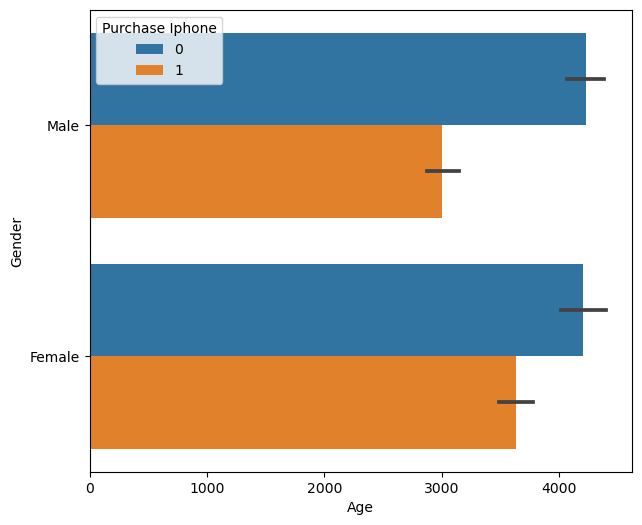

In [15]:
# gender and Age wise Iphone purchase
plt.figure(figsize=(7,6))
sns.barplot(data=df,x='Age',y='Gender',estimator=sum,hue='Purchase Iphone')
plt.savefig('gender-age wise Iphone.jpg',bbox_inches='tight',dpi=200)
#plt.title('# of genders')

In [16]:
gender_values=df.Gender.value_counts().values
gender_values

array([204, 196], dtype=int64)

In [17]:
gender_names=df.Gender.value_counts().index
gender_names

Index(['Female', 'Male'], dtype='object')

TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'bb_box'

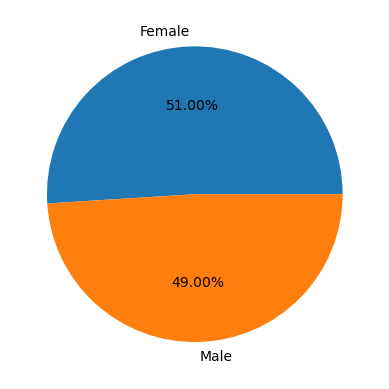

In [18]:
# Pie chart for male and female percentage
plt.pie(gender_values,labels=gender_names,autopct="%1.2f%%")
plt.savefig('Pie-Gender.jpg',bb_box="tight",dpi=200)

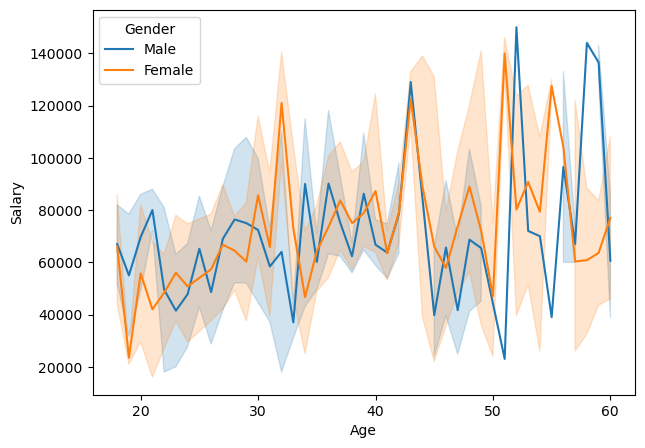

<Figure size 640x480 with 0 Axes>

In [19]:
# Age wise salary of male and females
plt.figure(figsize=(7,5))
sns.lineplot(x='Age', y='Salary', hue='Gender', data=df)
plt.show()
plt.savefig('age wise salary.jpg',bbox_inches='tight',dpi=200)

C:\Users\user\AppData\Local\Temp\ipykernel_3852\1125226338.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


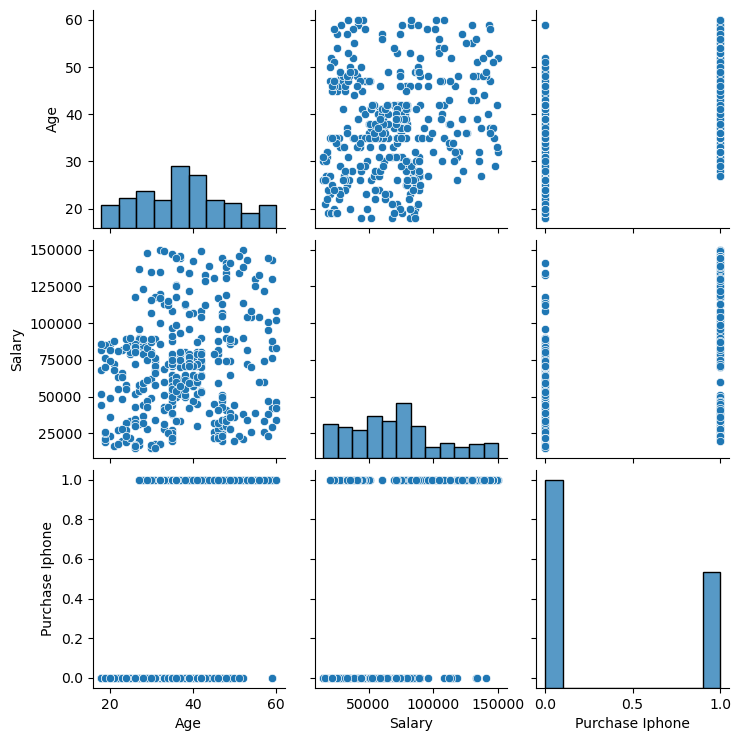

In [20]:
# correlation between the columns
sns.pairplot(df)
df.corr()

Text(0.5, 1.0, 'Age box plot')

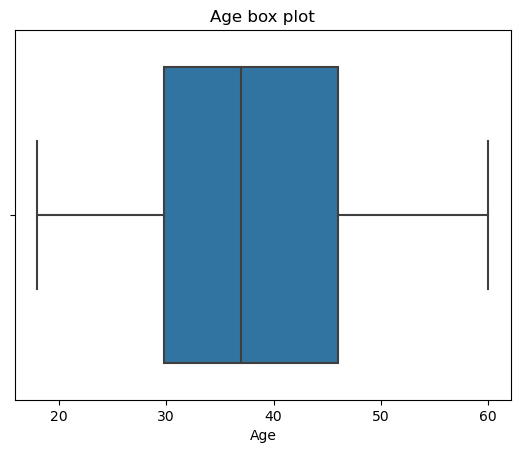

In [21]:
# Box plot to check outlier in Age data
sns.boxplot(x=df['Age'])
plt.savefig('Age box plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Age box plot')

Text(0.5, 1.0, 'Salary box plot')

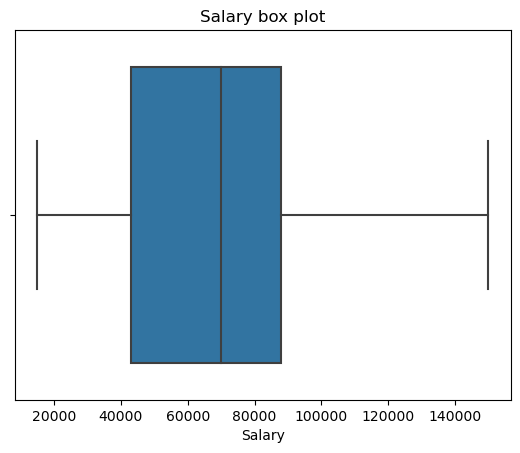

In [22]:
# Box plot to check outlier in Salary data
sns.boxplot(x=df['Salary'])
plt.savefig('Salary box plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Salary box plot')

No outliers are present in Salary data

The skewness of salary data is : 0.5


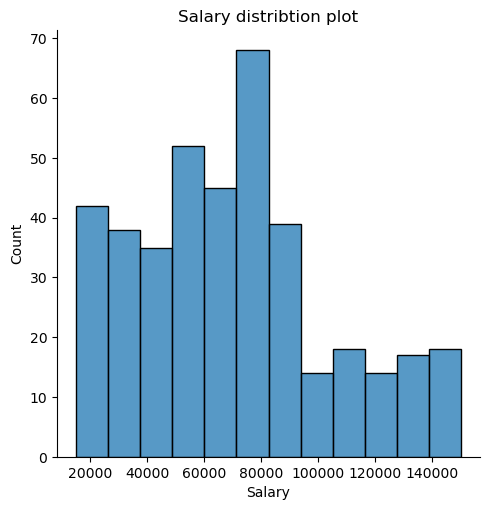

In [23]:
# Distribution plot to check skewness in Salary data
sns.displot(x=df['Salary'])
plt.savefig('Salary distribution plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Salary distribtion plot')
print('The skewness of salary data is :', round(df['Salary'].skew(),2))

The skewness is : 0.23


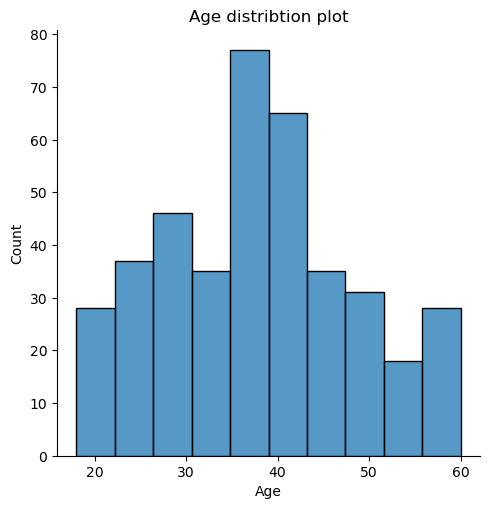

In [24]:
# Distribution plot to check skewness in Age data
sns.displot(x=df['Age'])
plt.savefig('Age distribution plot.jpg',bbox_inches='tight',dpi=200)
plt.title('Age distribtion plot')
print('The skewness is :', round(df['Age'].skew(),2))

both the salary and Age data are normally distributed with skewness around 0.50 and 0.23, repectively

Encoding :

1.The data has column as gender which is a categorical independent column. 

2.This categorical feature should be converted to some integral values via one hot encoding method.

In [25]:
# One hot encoding
df_gender=pd.get_dummies(df['Gender']).astype('int')
df_gender.head(2)

,Female,Male
0,0,1
1,0,1


In [26]:
# lets concatenate the two data sets
df1=pd.concat([df,df_gender],axis=1)
df1.head(2)

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1


## Model: KNN Regression

    Sampling of data

In [28]:
df1.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone', 'Female', 'Male'], dtype='object')

In [29]:
x=df1[['Age', 'Salary', 'Female', 'Male']]
y=df1['Purchase Iphone']

In [30]:
# standardization of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [31]:
x_sc=sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2, random_state=1)

In [34]:
x_train.shape,x_test.shape

((320, 4), (80, 4))

     Model Building  

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
clf=KNeighborsClassifier(n_neighbors=3)

In [37]:
clf_fit=clf.fit(x_train,y_train)

-------Model Prediction--------

In [38]:
pred=clf_fit.predict(x_test)

In [39]:
pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [40]:
dd=pd.DataFrame(pred,columns=['predicted'])
dd['Actual']=y_test.values
dd.head()

,predicted,Actual
0,0,0
1,0,0
2,1,1
3,1,1
4,1,0


     Error Calculation

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print('Model: KNN Regression')

print('The accuracy of the model is:',accuracy_score(dd['Actual'],dd['predicted']))
print('The confusion matrix is :',confusion_matrix(dd['Actual'],dd['predicted']))
print('The confusion matrix is :\n',classification_report(dd['Actual'],dd['predicted']))

Model: KNN Regression
The accuracy of the model is: 0.85
The confusion matrix is : [[39  9]
 [ 3 29]]
The confusion matrix is :
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80



<Axes: >

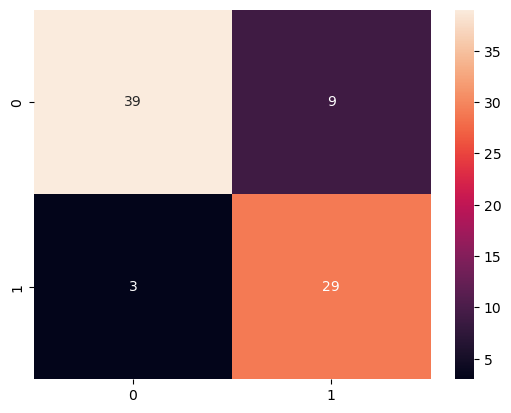

In [43]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True)

    Choosing a K value    

In [45]:
error=[]
for i in range(1,31):     ## considering k values from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error.append(1-accuracy_score(y_test,predict_i))   ## 1-accuracy is error

In [46]:
error

[0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.13749999999999996,
 0.13749999999999996,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.09999999999999998,
 0.09999999999999998,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.11250000000000004,
 0.125,
 0.125,
 0.125,
 0.13749999999999996,
 0.125]

TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'bb_box'

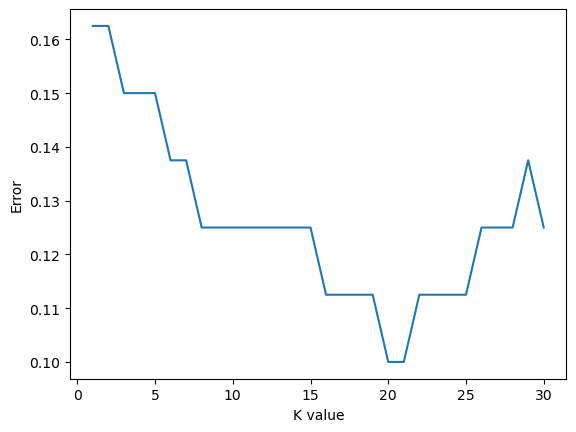

In [47]:
# plotting error for different k values
plt.plot(range(1,31),error)
plt.xlabel('K value')
plt.ylabel('Error')
plt.savefig('Error-K value plot.jpg', bb_box='tight', dpi=200)

Here, for k=20 the error is least so, we will substitute this k value in the model

In [48]:
clf_new=KNeighborsClassifier(n_neighbors=20)

In [49]:
clf_new_fit=clf_new.fit(x_train,y_train)
pred_new=clf_new_fit.predict(x_test)

In [50]:
print('Model: KNN Regression')
print('The accuracy of the model is:',accuracy_score(pred_new,y_test))
print('The confusion matrix is :',confusion_matrix(pred_new,y_test))
print('The confusion matrix is :\n',classification_report(pred_new,y_test))

Model: KNN Regression
The accuracy of the model is: 0.9
The confusion matrix is : [[42  2]
 [ 6 30]]
The confusion matrix is :
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.94      0.83      0.88        36

    accuracy                           0.90        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.90      0.90      0.90        80



The accuracy score is improved much on choosing k value 20

        Saving the model     

In [51]:
import joblib

In [52]:
file_name='Project_using_KNN.sav'

In [53]:
joblib.dump(clf_new_fit,file_name)

['Project_using_KNN.sav']